In [1]:
%matplotlib notebook
%matplotlib notebook


import os
from pathlib import Path as P
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt


if 'Demo scripts' in os.getcwd(): os.chdir('..')  # change to main directory
print('Current directory: {}'.format( os.getcwd() ))


#CaImAn stuff
import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr


# CASCADE stuff
# import glob
# import scipy.io as sio
# import ruamel.yaml as yaml

# from cascade2p import cascade
# from cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth
# from cascade2p import checks

# checks.check_packages()

Current directory: /home/ar4210/ar4210_data_analysis/Cascade-master


# Specify working directories

In [2]:
# LEC_data/AdityaMC/RMLEC11/173129/recording_20180509_173129_MC_20210726T160407.tif
# LEC_data/AdityaMC/RMLEC9/161159/recording_20180509_161159_MC_20210726T123647.tif
#"Inscopix_Data/wfC318/wfC318_2016_10_15/my_copy_recording_20161015_162122.hdf5"
path = "New_Analysis_Pipeline_Test/Test_Data/Raw_Data/wfC318_2016_10_18/recording_20161018_155817.hdf5"

# path = input("Enter file path: \n/home/ar4210/engram/anole/Mouse/")
full_data_dir = f"/home/ar4210/engram/anole/Mouse/{path}"

In [3]:
os.path.exists(full_data_dir)

True

In [4]:
path = P(full_data_dir)

home_parts = path.parts[:3]
engram_dir_parts = path.parts[:10]

home = P(*home_parts)
engram_path = P(*engram_dir_parts)
cwd = os.getcwd()

fstem = path.stem # file name without extension
extension = path.suffix # .tif, .hdf5, etc.
fname = path.name # fstem + extension

storage_folder = path.parts[9]

print(home)
print(engram_path)
print(fstem, extension, fname)

/home/ar4210
/home/ar4210/engram/anole/Mouse/New_Analysis_Pipeline_Test/Test_Data/Raw_Data/wfC318_2016_10_18
recording_20161018_155817 .hdf5 recording_20161018_155817.hdf5


In [5]:
# destination directories
destination_dir     = os.path.join(cwd, "collected_data")
traces_dir          = os.path.join(destination_dir, "Traces")
inferred_spikes_dir = os.path.join(destination_dir, "InferredSpikes")

# CaImAn STEP

In [6]:
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or

/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) -

/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequ

/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/scipy/sparse/dia.py:311: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(n

In [7]:
f = [f"{full_data_dir}"]

### Motion Correction

#### MoCorr Parameters

In [8]:
frate = 20                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = True         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': f[0],
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan,
    'var_name_hdf5':'images'
}

opts = params.CNMFParams(params_dict=mc_dict)

#### Perform MoCorr

In [9]:
if motion_correct:
    # do motion correction rigid
    mc = MotionCorrect(f[0], dview=dview, var_name_hdf5 = 'images',**opts.get_group('motion'))
    mc.motion_correct(save_movie=True)
    f_mc = mc.fname_tot_els if pw_rigid else mc.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                     np.max(np.abs(mc.y_shifts_els)))).astype(np.int)
    else:
        bord_px = np.ceil(np.max(np.abs(mc.shifts_rig))).astype(np.int)
#         plt.subplot(1, 2, 1); plt.imshow(mc.total_template_rig)  # % plot template
#         plt.subplot(1, 2, 2); plt.plot(mc.shifts_rig)  # % plot rigid shifts
#         plt.legend(['x shifts', 'y shifts'])
#         plt.xlabel('frames')
#         plt.ylabel('pixels')

    bord_px = 0 if border_nan is 'copy' else bord_px
    f_new = cm.save_memmap(f_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    f_new = cm.save_memmap(f, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-9-f481b9cf2076>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  bord_px = 0 if border_nan is 'copy' else bord_px
<ipython-input-9-f481b9cf2076>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.max(np.abs(mc.y_shifts_els)))).astype(np.int)


### Load memmap'd file

In [10]:
Yr, dims, T = cm.load_memmap(f_new)
images = Yr.T.reshape((T,) + dims, order='F')

### CNMF-E

#### Parameters for CNMF-E

In [11]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (3, 3)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (13, 13)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = .8       # min peak value from correlation image
min_pnr = 10        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor


opts = params.CNMFParams(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # leave as is for 1 photon
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': 0})                # number of pixels to not consider in the borders)

In [12]:
cn_filter, pnr = cm.summary_images.correlation_pnr(images[::5], gSig=gSig[0], swap_dim=False)
nb_inspect_correlation_pnr(cn_filter, pnr)

:Layout
   .AdjointLayout.Correlation :AdjointLayout
      :Image   [x,y]   (corr)
      :DynamicMap   []
   .AdjointLayout.Pnr         :AdjointLayout
      :Image   [x,y]   (pnr)
      :DynamicMap   []

#### Perform CNMF-E

In [13]:
cnm = cnmf.CNMF(n_processes=n_processes, dview=dview, Ain=Ain, params=opts)
cnm.fit(images)

/home/ar4210/anaconda3/envs/caiman/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


#### Evaluate components

In [14]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

min_SNR = 3            # adaptive way to set threshold on the transient size
r_values_min = 0.85    # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
estimates_object = cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

 ***** 
Number of total components:  675
Number of accepted components:  654


In [15]:
cnm.estimates.A

<97200x675 sparse matrix of type '<class 'numpy.float64'>'
	with 196979 stored elements in Compressed Sparse Column format>

In [16]:
print(cnm.estimates.A)

  (18435, 0)	0.004997201806388046
  (18434, 0)	0.009939883062177846
  (18433, 0)	0.011827481921596404
  (18432, 0)	0.017663866769704942
  (18431, 0)	0.017663866769704942
  (18430, 0)	0.016177036472055716
  (18429, 0)	0.00663293846493821
  (18166, 0)	0.009939883062177846
  (18165, 0)	0.012019558805761912
  (18164, 0)	0.015824819614968365
  (18163, 0)	0.01803938531579604
  (18162, 0)	0.02097588428061378
  (18161, 0)	0.021636977970828527
  (18160, 0)	0.025408321877151755
  (18159, 0)	0.01938469743395387
  (18158, 0)	0.016177036472055716
  (17897, 0)	0.005251620487524838
  (17896, 0)	0.015824819614968365
  (17895, 0)	0.019568758425343384
  (17894, 0)	0.022235602272889194
  (17893, 0)	0.0269779318440819
  (17892, 0)	0.029211964047849474
  (17891, 0)	0.030819994793283238
  (17890, 0)	0.030819994793283238
  (17889, 0)	0.03006775815771828
  :	:
  (60599, 674)	0.006161983743626126
  (60598, 674)	0.006161983743626126
  (60597, 674)	0.008456322110384374
  (60596, 674)	0.013363642535006303
  (6059

#### Refit Data to full FOV

In [22]:
# cnm2 = cnm.refit(images, dview=dview)

In [23]:
# estimates_object_2 = cnm2.estimates.evaluate_components(images, cnm2.params, dview=dview)

# print(' ***** ')
# print('Number of total components: ', len(cnm2.estimates.C))
# print('Number of accepted components: ', len(cnm2.estimates.idx_components))

In [15]:
cm.stop_server(dview=dview)

# CASCADE STEP

### Save Calcium Traces from CaImAn as *.npy file

In [25]:
np.save(f"Ca_Traces_{fstem}", estimates_object.C[cnm.estimates.idx_components])
# np.save(f"Ca_Traces_{fstem}_2", estimates_object.C[int(len(estimates_object.C / 2)):])


### Define function to load in *.npy file

In [26]:
def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    if file_path.endswith('.mat'):
        traces = sio.loadmat(file_path)['dF_traces']

    elif file_path.endswith('.npy'):
        traces = np.load(file_path, allow_pickle=True)
        # if saved data was a dictionary packed into a numpy array (MATLAB style): unpack
        if traces.shape == ():
            traces = traces.item()['dF_traces']
    else:
        raise Exception('This function only supports .mat or .npy files.')
    
    # do here transposing or percent to numeric calculation if necessary
    # traces = traces.T
    # traces = traces / 100
    
    return traces

### Load in calcium traces, plot noise level distributions

In [27]:
example_file = f'Ca_Traces_{fstem}.npy'

traces = load_neurons_x_time( example_file )
frame_rate = 20


print('Number of neurons in dataset:', traces.shape[0])
print('Number of timepoints in dataset:', traces.shape[1])

# interactive plotting
# %matplotlib notebook

noise_levels = plot_noise_level_distribution(traces,frame_rate)

# plt.rcParams['figure.figsize'] = (8.0, 8.0)
# np.random.seed(3452)
# neuron_indices = np.random.randint(traces.shape[0], size=10)
# plot_dFF_traces(traces,neuron_indices,frame_rate)

Number of neurons in dataset: 723
Number of timepoints in dataset: 26972


<IPython.core.display.Javascript object>

### List available models from CASCADE

In [28]:
cascade.download_model( 'update_models',verbose = 1)

yaml_file = open('Pretrained_models/available_models.yaml')
X = yaml.load(yaml_file, Loader=yaml.Loader)
list_of_models = list(X.keys())
print('\n List of available models: \n')
for model in list_of_models:
    print(model)

You can now check the updated available_models.yaml file for valid model names.
File location: /home/ar4210/ar4210_data_analysis/Cascade-master/Pretrained_models/available_models.yaml

 List of available models: 

Global_EXC_30Hz_smoothing50ms_asymmetric_window_1_frame
Global_EXC_30Hz_smoothing50ms_asymmetric_window_2_frames
Global_EXC_30Hz_smoothing50ms_asymmetric_window_4_frames
Global_EXC_30Hz_smoothing50ms_asymmetric_window_6_frames
Global_EXC_30Hz_smoothing50ms_asymmetric_window_8_frames
GCaMP6f_mouse_30Hz_smoothing200ms
OGB_zf_pDp_7.5Hz_smoothing200ms
Global_EXC_5Hz_smoothing200ms
Global_EXC_5Hz_smoothing200ms_causalkernel
Global_EXC_6Hz_smoothing200ms
Global_EXC_6Hz_smoothing200ms_causalkernel
Global_EXC_7.5Hz_smoothing200ms
Global_EXC_7.5Hz_smoothing200ms_causalkernel
Global_EXC_10Hz_smoothing100ms
Global_EXC_10Hz_smoothing100ms_causalkernel
Global_EXC_10Hz_smoothing200ms
Global_EXC_10Hz_smoothing200ms_causalkernel
Global_EXC_12.5Hz_smoothing100ms
Global_EXC_12.5Hz_smoothing100

### Pick a model from above and run it on your data.

In [ ]:
model_name = 'Global_EXC_20Hz_smoothing200ms_causalkernel'

cascade.download_model( model_name,verbose = 1)
spike_rates = cascade.predict( model_name, traces )

Pretrained model was saved in folder "/home/ar4210/ar4210_data_analysis/Cascade-master/Pretrained_models/Global_EXC_20Hz_smoothing200ms_causalkernel"

 
The selected model was trained on 18 datasets, with 5 ensembles for each noise level, at a sampling rate of 20Hz, with a resampled ground truth that was smoothed with a causal kernel of a standard deviation of 200 milliseconds. 
 

Loaded model was trained at frame rate 20 Hz
Given argument traces contains 723 neurons and 26972 frames.
Noise levels (mean, std; in standard units): 46.18, 36.06

Predictions for noise level 2:
	... ensemble 0
17/17 [==============================] - 3s 66ms/step
	... ensemble 1
17/17 [==============================] - 1s 60ms/step
	... ensemble 2
17/17 [==============================] - 1s 63ms/step
	... ensemble 3
17/17 [==============================] - 1s 52ms/step
	... ensemble 4
17/17 [==============================] - 1s 56ms/step

Predictions for noise level 3:
	... ensemble 0
24/24 [==============

### Create DataFrames for Ca2+ traces, CaImAn inferred spikes, CASCADE 100ms smoothing inferred spikes, and CASCADE 200ms inferred spikes.

In [16]:
ca_traces_df = pd.DataFrame(np.array(cnm.estimates.C[cnm.estimates.idx_components]))
caiman_s_df = pd.DataFrame(np.array(cnm.estimates.S[cnm.estimates.idx_components]))
# cascade_s_df = pd.DataFrame(spike_rates)#[cnm.estimates.idx_components])

### Preprocessing of data

CaImAn ca_traces are on a much greater scale than CaImAn inferred spikes, so ca_traces_df can be divided by 100,000.<br>
CASCADE DataFrames are filled with NaN values so they are replaced with zeroes.

In [17]:
ca_traces_df = ca_traces_df / 1000000
# cascade_s_df = cascade_s_df.fillna(value = 0)

### Plot Ca2+ traces and compare CaImAn and CASCADE 100ms smoothing

There are 630 total neurons. 623 of them are acceptable, while 7 were rejected.


<IPython.core.display.Javascript object>


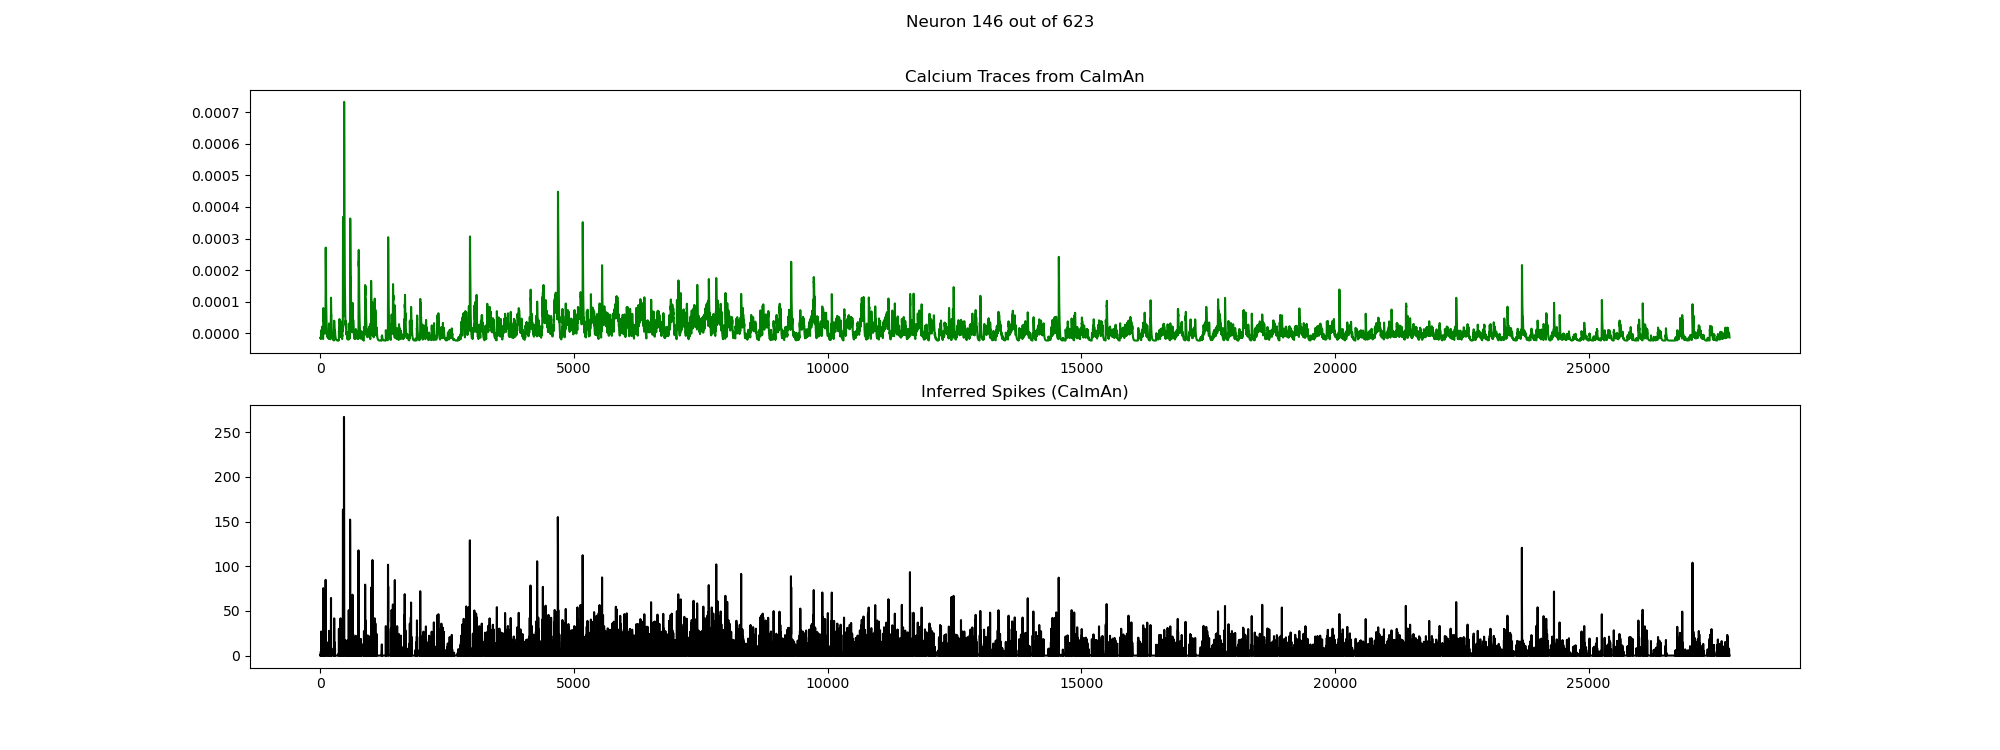

[<AxesSubplot:> <AxesSubplot:>]


In [18]:
# %matplotlib inline
import random

print(f"There are {len(cnm.estimates.C)} total neurons. {len(cnm.estimates.idx_components)} of them are acceptable, while {len(cnm.estimates.idx_components_bad)} were rejected.")
neuron = random.randrange(len(cnm.estimates.idx_components))#int(input(f"Pick a neuron from 0 to {len(cnm.estimates.idx_components)-1}\n\n****\n\n"))
  

fig, axs = plt.subplots(2 , 1, figsize = (20,7.5))
x = ca_traces_df.columns

fig.suptitle(f"Neuron {neuron} out of {len(cnm.estimates.idx_components)}")

axs[0].plot(ca_traces_df.loc[neuron], color='green')
axs[0].set_title("Calcium Traces from CaImAn")
# axs[0 , 1].plot(ca_traces_df.loc[neuron], color='green')
# axs[0 , 1].set_title("Calcium Traces from CaImAn")


axs[1].plot(caiman_s_df.loc[neuron], color = 'black')
axs[1].set_title("Inferred Spikes (CaImAn)")
# axs[1 , 1].plot(cascade_s_df.loc[neuron], color = 'black')
# axs[1 , 1].set_title("Inferred Spikes (CASCADE, causal 200ms smoothing)")

# axs[1 , 0].sharey(axs[1 , 1])

plt.show()

In [ ]:
now = dt.now()

ctime = now.strftime("%Y%m%d_%H%M%S")

if not os.path.exists(f"{destination_dir}/{storage_folder}"):
    os.mkdir(f"{destination_dir}/{storage_folder}")
    
plt.savefig(f"{destination_dir}/{storage_folder}/{fstem}_CA1_PLOT_causal_200ms_{ctime}.png")
# cascade_s_df.to_csv(f"{destination_dir}/{storage_folder}/{fstem}_CascadeSpikes_{ctime}.csv")
# ca_traces_df.to_csv(f"{destination_dir}/{storage_folder}/{fstem}_Traces_{ctime}.csv")
    